In [1]:
##Decision Trees using python

import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('E:/github/Employee-Attrition-master/Employee-Attrition-master/employees_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
y = data["Attrition"]
x = data.drop(["Attrition"],axis=1)

In [5]:
print(y.shape)
print(x.shape)

(1470,)
(1470, 34)


In [6]:
#Encoding
# try label encoding
x_dummies = pd.get_dummies(x)
x_dummies.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x_dummies,y,
                               test_size=0.3,random_state=0)

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Default criterian is gini indicating gini impurity.
# Use 'entropy' if you want to use information gain for the split

clf = DecisionTreeClassifier(criterion = "gini")   
clf.fit(x_dummies,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [10]:
x_test.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
442,36,635,10,4,1,592,2,32,3,3,...,0,0,1,0,0,0,1,1,1,0
1091,33,575,25,3,1,1545,4,44,2,2,...,0,0,0,0,0,0,1,1,1,0
981,35,662,18,4,1,1380,4,67,3,2,...,0,0,1,0,0,1,0,1,0,1
785,40,1492,20,4,1,1092,1,61,3,3,...,0,0,0,0,0,1,0,1,1,0
1332,29,459,24,2,1,1868,4,73,2,1,...,0,1,0,0,0,0,1,1,0,1


In [11]:
cols = list(x_dummies.columns.values)
#cols

# Drawing Tree
- Method 1:
    - Use plot_tree() method: This works only for sklearn version 21.0 and above
    - Note that Image rendering is not so good in this technique

In [12]:
import sklearn
sklearn.__version__    #checking for the version of sklearn
from sklearn import tree

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

tree.plot_tree(clf.fit(x_dummies,y),feature_names=cols, filled=True, 
               precision=3,proportion=True,rounded=True) 
plt.show()

<Figure size 1500x800 with 1 Axes>

# Drawing Tree
- Method 2:
    - Run the following command to install pydotplus:
             !pip install pydotplus
    - Run the following command to install graphviz:
            !pip install graphviz
       (Alternatively: run 'conda install graphviz' through Anaconda prompt window)
    - Download graphviz-2.38 from 
     https://graphviz.gitlab.io/_pages/Download/Download_windows.html

    - Unzip the file and keep the entire folder inside C:\Program Files(x86).
    - Set the path of this file by adding new system environment variable
                 C:\Program Files (x86)\graphviz-2.38\release\bin

In [24]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
import os
from sklearn import tree
from sklearn.tree import export_graphviz

In [ ]:
dot_data = StringIO()
export_graphviz (clf, out_file=dot_data, feature_names=cols, 
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])

#export_graphviz(clf, out_file=None, feature_names=cols,filled=True, rounded=True,special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [28]:
from sklearn.metrics import accuracy_score

pred_prob = pd.DataFrame(clf.predict_proba(x_test),
                         columns=['Prob_0', 'Prob_1'])
#print(pred_prob)
accuracy = accuracy_score(y_pred,y_test)
accuracy

1.0

In [29]:
#y_pred

In [30]:
#y_test

In [31]:
# Display confusion matrix
# Draw ROC

### Pruning
#### Also called as parameter tuning
- Pruning helps us to avoid overfitting
    - Generally it is preferred to have a simple model, it avoids overfitting issue
    - Any additional split that does not add significant value is not worth while.
- We can avoid overfitting by changing the pruning parameters like
    - max_leaf_nodes: Reduces the number of leaf nodes
    - min_samples_leaf:
        - Indicates the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model. The default value is 1.
        - For pruning, restrict the size of sample leaf
        - Minimum sample size in terminal nodes can be fixed to 30, 100, 300 or 5% of total
    - max_depth
        - Indicates the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. 
        - For pruning, reduce the depth of the tree to build a generalized tree
        - Set the depth of the tree to 3, 5, 10 depending after verification on test data




In [32]:
from sklearn.tree import DecisionTreeClassifier

'''
The parameter splitter indicates the strategy used to choose the split 
at each node. Supported strategies are “best” to choose the best split 
and “random” to choose the best random split.

'''

clf = DecisionTreeClassifier(criterion = "gini", splitter = 'random', 
                             max_leaf_nodes = 10, min_samples_leaf = 5, 
                             max_depth= 4)   
clf.fit(x_dummies,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

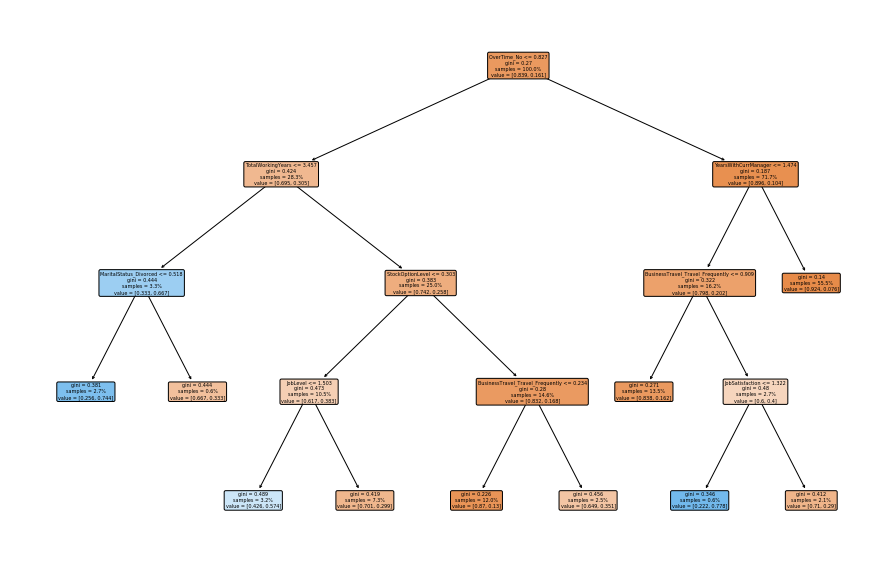

In [33]:
plt.figure(figsize=(15,10))

tree.plot_tree(clf.fit(x_dummies,y),feature_names=cols, filled=True, 
               precision=3,proportion=True,rounded=True) 
plt.show()

In [34]:
y_pred = clf.predict(x_test)

In [35]:
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.8526077097505669

In [36]:
# draw confusion matrix and ROC